## Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
#assigming index id to movie_name and rearranging df so that it's the first column
movie = pd.read_csv('resources/Adjusted_Joined_v2.csv',encoding='latin-1')
movie['id'] = movie.index
movie = movie[['id'] + movie.columns[:-1].tolist()]
movie_final = movie.drop(['movie_name'], axis=1)
movie_final.head()

,id,Inflation_Success_Failure_Domestic,boxofficemojo_Success_Failure_Domestic,production_year,production_budget,production_budget_adjusted,domestic_box_office,inflation_domestic_adjusted,boxofficemojo_domestic_adjusted,international_box_office,...,vote_count,actor1_name,actor1_gender,actor2_name,actor2_gender,director_name,director_gender,producer_name,screeplay_name,editor_name
0,0,0,0,2006,32000000,32273517,1308696,1582213,1792214,5369337,...,83,George Clooney,2,Cate Blanchett,1,Steven Soderbergh,2,none,Paul Attanasio,Steven Soderbergh
1,1,0,0,2006,35000000,37120098,10144010,12264108,13891873,5317628,...,764,Hugh Jackman,2,Rachel Weisz,1,Darren Aronofsky,2,Arnon Milchan,Darren Aronofsky,Jay Rabinowitz
2,2,0,0,2006,13000000,15875021,13756082,16631103,18838482,54111916,...,510,Ken Watanabe,2,Kazunari Ninomiya,0,Clint Eastwood,2,Clint Eastwood,Paul Haggis,Joel Cox
3,3,0,0,2006,27500000,31159615,17510118,21169733,23979505,33068293,...,220,Judi Dench,1,Cate Blanchett,1,Richard Eyre,2,Robert Fox,Patrick Marber,John Bloom
4,4,1,1,2007,72500000,104914897,183135014,215549911,238767598,343936008,...,2043,Dan Castellaneta,2,Julie Kavner,1,David Silverman,2,James L. Brooks,Matt Groening,John Carnochan


In [3]:
movie_final.dropna(inplace=True)
movie_final.shape

#1403 movies and 31 Original Features

(1403, 31)

In [4]:
movie_final.head()

,id,Inflation_Success_Failure_Domestic,boxofficemojo_Success_Failure_Domestic,production_year,production_budget,production_budget_adjusted,domestic_box_office,inflation_domestic_adjusted,boxofficemojo_domestic_adjusted,international_box_office,...,vote_count,actor1_name,actor1_gender,actor2_name,actor2_gender,director_name,director_gender,producer_name,screeplay_name,editor_name
0,0,0,0,2006,32000000,32273517,1308696,1582213,1792214,5369337,...,83,George Clooney,2,Cate Blanchett,1,Steven Soderbergh,2,none,Paul Attanasio,Steven Soderbergh
1,1,0,0,2006,35000000,37120098,10144010,12264108,13891873,5317628,...,764,Hugh Jackman,2,Rachel Weisz,1,Darren Aronofsky,2,Arnon Milchan,Darren Aronofsky,Jay Rabinowitz
2,2,0,0,2006,13000000,15875021,13756082,16631103,18838482,54111916,...,510,Ken Watanabe,2,Kazunari Ninomiya,0,Clint Eastwood,2,Clint Eastwood,Paul Haggis,Joel Cox
3,3,0,0,2006,27500000,31159615,17510118,21169733,23979505,33068293,...,220,Judi Dench,1,Cate Blanchett,1,Richard Eyre,2,Robert Fox,Patrick Marber,John Bloom
4,4,1,1,2007,72500000,104914897,183135014,215549911,238767598,343936008,...,2043,Dan Castellaneta,2,Julie Kavner,1,David Silverman,2,James L. Brooks,Matt Groening,John Carnochan


In [5]:
#Get dummies
movie_final = pd.get_dummies(movie_final)
# movie_new = movie_final.drop(['inflation_domestic_adjusted', 'boxofficemojo_domestic_adjusted'])

In [6]:
# #created dataframe with correlations for all columns 
# name = []
# correlation = []
# for movie in movie_final:
#     name.append(movie)
#     correlation.append(movie_final['Success_Failure_Domestic'].corr(movie_final[movie]))
# correlation_df = pd.DataFrame({'name': name, 'correlation': correlation})[['name','correlation']]
# positive_df = correlation_df.sort_values(by=['correlation'], ascending=False)
# positive_df.head(50)

In [7]:
# #making a list based off the top correlated columns to feed into regression
# top = positive_df['name'].values.tolist()[:50]
# top.remove('domestic_box_office')
# top.remove('international_box_office')
# top.remove('350k_Movies.revenue')
# top.remove('Success_Failure_Domestic')
# top.remove('Success_Failure_All')
# # top.remove('id')

# top[:50]

In [8]:
#Dropping biased features
x_names = list(movie_final.columns.values)
x_names.remove('inflation_domestic_adjusted')
x_names.remove('boxofficemojo_domestic_adjusted')
x_names.remove('id')
x_names.remove('production_budget')
x_names.remove('Inflation_Success_Failure_Domestic')
x_names.remove('boxofficemojo_Success_Failure_Domestic')
x_names.remove('domestic_box_office')
x_names.remove('international_box_office')
x_names.remove('production_budget_adjusted')

print("all", len(x_names), "dummy features listed")
x_names

all 4892 dummy features listed


['production_year',
 'sequel',
 'running_time',
 'popularity',
 'vote_average',
 'vote_count',
 'actor1_gender',
 'actor2_gender',
 'director_gender',
 'rating_G',
 'rating_Not Rated',
 'rating_PG',
 'rating_PG-13',
 'rating_R',
 'creative_type_Contemporary Fiction',
 'creative_type_Dramatization',
 'creative_type_Factual',
 'creative_type_Fantasy',
 'creative_type_Historical Fiction',
 'creative_type_Kids Fiction',
 'creative_type_Multiple Creative Types',
 'creative_type_Science Fiction',
 'creative_type_Super Hero',
 'source_Based on Comic/Graphic Novel',
 'source_Based on Factual Book/Article',
 'source_Based on Fiction Book/Short Story',
 'source_Based on Folk Tale/Legend/Fairytale',
 'source_Based on Game',
 'source_Based on Movie',
 'source_Based on Musical or Opera',
 'source_Based on Play',
 'source_Based on Real Life Events',
 'source_Based on Religious Text',
 'source_Based on Short Film',
 'source_Based on TV',
 'source_Based on Theme Park Ride',
 'source_Based on Toy',
 's

In [9]:
#Setting variables
X = movie_final[x_names]

y = movie_final["Inflation_Success_Failure_Domestic"]
# y = movie_final["boxofficemojo_Success_Failure_Domestic"]

In [10]:
#Splitting test/train set of a random state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Logistic Regression

In [11]:
#instanciating model
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
#fitting our dataset
logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
print(f"Training Data Score: {logis.score(X_train, y_train)}")
print(f"Testing Data Score: {logis.score(X_test, y_test)}")

Training Data Score: 0.9781368821292775
Testing Data Score: 0.8347578347578347


In [14]:
logis = LogisticRegression(class_weight="balanced")
logis.fit(X_train, y_train)

print ("\n\n ---Logistic Regression Model---")
print ("")
logic_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % logic_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))



 ---Logistic Regression Model---

Logistic Regression AUC = 0.65
             precision    recall  f1-score   support

          0       0.88      0.91      0.90       291
          1       0.48      0.38      0.43        60

avg / total       0.81      0.82      0.82       351



## Random Forest Classifier

In [15]:
#Instanciating
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
#Training the rf model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.9724334600760456
Testing Data Score: 0.8319088319088319


In [18]:
rf = RandomForestClassifier(
  n_estimators=1000,
  max_depth=None,
  min_samples_split=5,
  class_weight="balanced",
  #min_weight_fraction_leaf=0.02
  )

rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
print ("")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---

Random Forest AUC = 0.54
             precision    recall  f1-score   support

          0       0.84      1.00      0.91       291
          1       1.00      0.08      0.15        60

avg / total       0.87      0.84      0.78       351



In [19]:
rf.feature_importances_
print(len(rf.feature_importances_))

4892


In [20]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

# Flipping indices to top 200 features
indices = np.argsort(importances)[:-201:-1]

# Printing the features ranking: top 200
print("Feature ranking:")
for f in range(201):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], x_names[indices[f]], importances[indices[f]]))  

Feature ranking:
1. feature 5: vote_count (0.038992)
2. feature 3: popularity (0.035062)
3. feature 4: vote_average (0.033340)
4. feature 0: production_year (0.023600)
5. feature 2: running_time (0.023287)
6. feature 49: genre_Action (0.015659)
7. feature 505: production_countries_United States of America (0.012257)
8. feature 6: actor1_gender (0.008708)
9. feature 56: genre_Horror (0.007537)
10. feature 7: actor2_gender (0.007097)
11. feature 1: sequel (0.006484)
12. feature 14: creative_type_Contemporary Fiction (0.005900)
13. feature 55: genre_Drama (0.005874)
14. feature 8: director_gender (0.005794)
15. feature 52: genre_Comedy (0.005236)
16. feature 12: rating_PG-13 (0.005217)
17. feature 13: rating_R (0.005190)
18. feature 39: source_Original Screenplay (0.004760)
19. feature 4362: screeplay_name_none (0.004754)
20. feature 59: genre_Thriller/Suspense (0.004257)
21. feature 3692: producer_name_none (0.004207)
22. feature 431: production_companies_Universal Pictures (0.004062)
23

181. feature 2302: director_name_David E. Talbert (0.000874)
182. feature 826: actor1_name_Jesse Eisenberg (0.000873)
183. feature 4184: screeplay_name_Paul Rudd (0.000873)
184. feature 2871: director_name_Sam O'Steen (0.000873)
185. feature 584: actor1_name_Billy Crystal (0.000871)
186. feature 1831: actor2_name_Naomi Campbell (0.000866)
187. feature 2677: director_name_Michael Cohn (0.000866)
188. feature 266: production_companies_Legendary Pictures (0.000864)
189. feature 1081: actor1_name_Roma Downey (0.000861)
190. feature 2886: director_name_Sean McNamara (0.000860)
191. feature 4734: editor_name_Patrick Lussier (0.000859)
192. feature 3806: screeplay_name_Christopher B. Landon (0.000857)
193. feature 3132: producer_name_Chris Weitz (0.000857)
194. feature 3353: producer_name_Jon Kilik (0.000855)
195. feature 3129: producer_name_Chris Burt (0.000855)
196. feature 3528: producer_name_Peter Chernin (0.000854)
197. feature 1448: actor2_name_Elle Fanning (0.000851)
198. feature 1184:

IndexError: index 200 is out of bounds for axis 0 with size 200

In [ ]:
# #sample plot
# feature_importances = pd.Series(importances[indices], index=X.columns[indices])
# feature_importances.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last', inplace=True)
# feature_importances.plot(kind="bar", figsize=(50,5), fontsize=14)

## Feature Importances

In [ ]:
# Plot the feature importances of the random forest. top 200 features
plt.figure(figsize=(50,10))
plt.title("Feature Importances")
plt.bar(range(200), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(200), X.columns[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, 101])
plt.show()

In [21]:
# # graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

# def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
#     if autoscale:
#         x_scale = model.feature_importances_.max()+headroom
#     else:
#         x_scale = 1
    
#     feature_dict=dict(zip(feature_names, model.feature_importances_))
    
#     if summarized_columns:
#         for col_name in summarized_columns:
#             sum_value= sum(x for i, x in feature_dict.iteritems() if col_name in i)
            
#             key_to_remove = [i for i in feature_dict_keys() if col_name in i]
#             for i in keys_to_remove:
#                 feature_dict.pop(i)
#             feature_dict[col_name] = sum_value
#     results = pd.Series(feature_dict.values(), index=feature_dict.keys())
#     results.sort(axis=1)
#     results.pliot(kind="barh", figsize=(width, len(results)/4), xlim=(0,x_scale))
    
# graph_feature_importances(model, X.columns, summarized_columns=movie_final.columns)

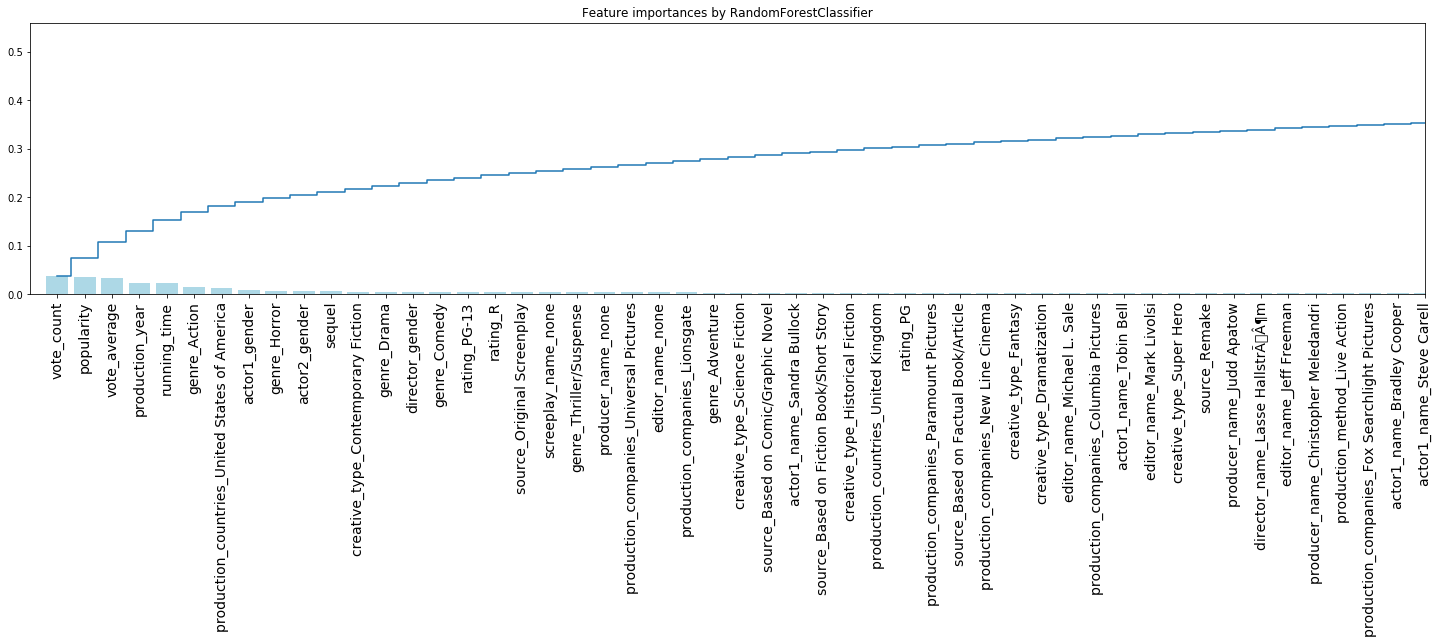

In [22]:
plt.figure(figsize=(25,5))
plt.title("Feature importances by RandomForestClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), X.columns[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, 50])
plt.show()

## Parameter Testing

## n_jobs

In [23]:
# #timing the model with n_jobs=1
# %%%timeit
# model = RandomForestClassifier(1000, oob_score=True, n_jobs=1, random_state=42)
# model.fit(X,y)

In [24]:
# #timing the model with n_job = -1 (max)
# %%%timeit
# model = RandomForestClassifier(1000, oob_score=True, n_jobs=-1, random_state=42)
# model.fit(X,y)

## n_estimaters

20 trees
Random Forest AUC = 0.54

50 trees
Random Forest AUC = 0.54

100 trees
Random Forest AUC = 0.54

200 trees
Random Forest AUC = 0.54

500 trees
Random Forest AUC = 0.54

1000 trees
Random Forest AUC = 0.54

2000 trees
Random Forest AUC = 0.54



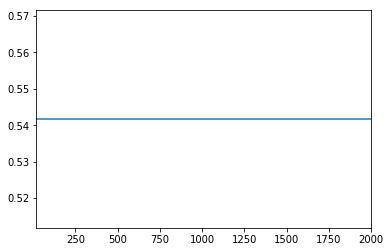

In [27]:
#setting gird of parameters and testing for best results
results = []
n_estimators_options = [20, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimators_options:
    model = RandomForestClassifier(
    n_estimators=trees,
    max_depth=None,
    min_samples_split=5,
    class_weight="balanced",
    max_features=1000,
  )
    model.fit(X,y)
    print (trees,"trees")
    roc = roc_auc_score(y_test, rf.predict(X_test))
    print ("Random Forest AUC = %2.2f" % rf_roc_auc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimators_options).plot();

In [32]:
results = []
max_features_options = ["auto", "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, max_features=max_features)
    model.fit(X,y)
    print (max_features,"max_features")
    roc = roc_auc_score(y_test, model.predict(X_test))
    print ("C-stat:",roc)
    results.append(roc)
    print ("")

auto max_features
C-stat: 1.0

sqrt max_features
C-stat: 1.0

log2 max_features
C-stat: 1.0

0.9 max_features
C-stat: 1.0

0.2 max_features
C-stat: 1.0



In [33]:
print(len(x_names))
print(len(importances))
print(len(indices))

4892
4892
200


In [34]:
x_names[1:100]

['sequel',
 'running_time',
 'popularity',
 'vote_average',
 'vote_count',
 'actor1_gender',
 'actor2_gender',
 'director_gender',
 'rating_G',
 'rating_Not Rated',
 'rating_PG',
 'rating_PG-13',
 'rating_R',
 'creative_type_Contemporary Fiction',
 'creative_type_Dramatization',
 'creative_type_Factual',
 'creative_type_Fantasy',
 'creative_type_Historical Fiction',
 'creative_type_Kids Fiction',
 'creative_type_Multiple Creative Types',
 'creative_type_Science Fiction',
 'creative_type_Super Hero',
 'source_Based on Comic/Graphic Novel',
 'source_Based on Factual Book/Article',
 'source_Based on Fiction Book/Short Story',
 'source_Based on Folk Tale/Legend/Fairytale',
 'source_Based on Game',
 'source_Based on Movie',
 'source_Based on Musical or Opera',
 'source_Based on Play',
 'source_Based on Real Life Events',
 'source_Based on Religious Text',
 'source_Based on Short Film',
 'source_Based on TV',
 'source_Based on Theme Park Ride',
 'source_Based on Toy',
 'source_Based on Web S

## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = tree.DecisionTreeClassifier()

In [36]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
dtree = tree.DecisionTreeClassifier(
  class_weight="balanced",
  min_weight_fraction_leaf=0.01
  )

dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))



 ---Decision Tree Model---
Decision Tree AUC = 0.63
             precision    recall  f1-score   support

          0       0.88      0.75      0.81       291
          1       0.30      0.52      0.38        60

avg / total       0.78      0.71      0.74       351



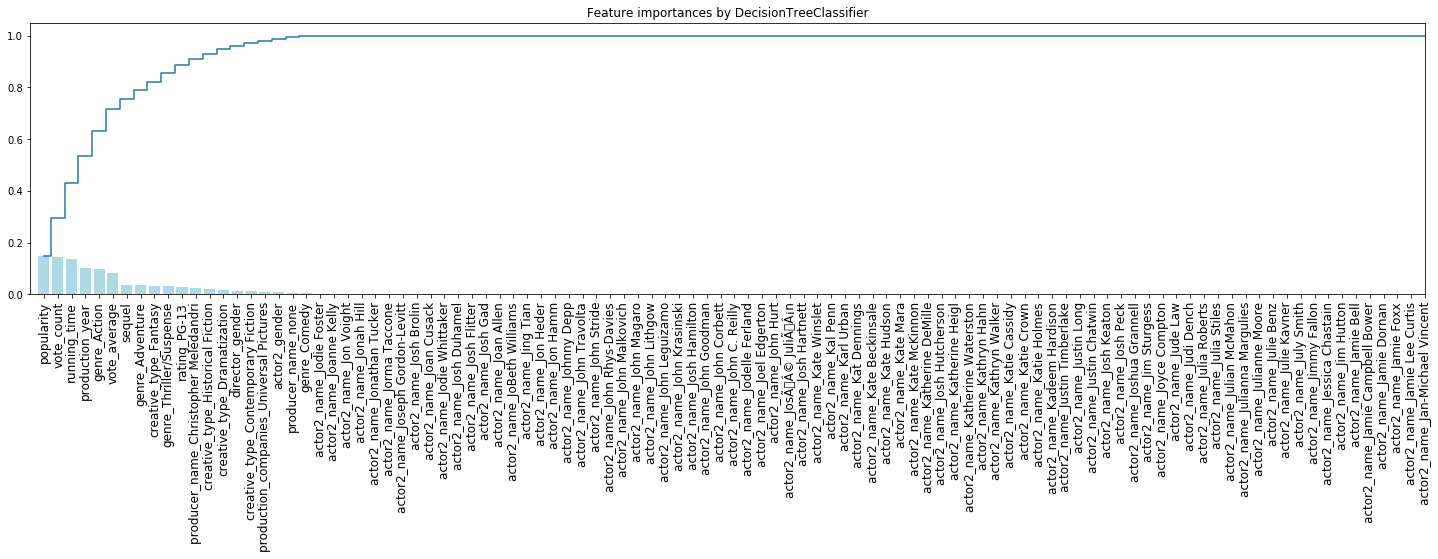

In [38]:
importances = dtree.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(25,5))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), X.columns[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, 100])
plt.show()

## Roc Curve

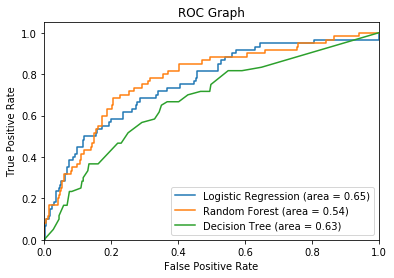

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logic_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()